In [69]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)

In [70]:
# Data cleaning
print("Number of rows is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned data is: " + str(df.shape[0]))

Number of rows is: 8949721
Number of rows cleaned data is: 7450939


In [71]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

sorting_center_name
VANTAA       4888466
TAMPERE      1154436
KUOPIO        578274
LIETO         443087
OULU          354047
SEINÄJOKI      32629
Name: count, dtype: int64

In [72]:
def chute_demand_per_weekday(df, sorting_center_name):
    df = df[df["sorting_center_name"] == sorting_center_name]
    chutes = df["output_belt"].unique()

    chute_weekday_share_dict = {}

    for chute in chutes:
        df_chute = df[df["output_belt"] == chute]
        if df_chute.shape[0] <= 1000:
            continue
        chute_weekday_share_dict[chute] = df_chute.groupby('weekday')['no_of_events'].sum() / df_chute['no_of_events'].sum() * 100

    plt.figure(figsize=(10, 6))

    for chute, weekday_data in chute_weekday_share_dict.items():
        plt.plot(weekday_data.index, weekday_data.values, marker='o', label=chute)

    plt.xlabel('Weekday (1 = Monday, 7 = Sunday)')
    plt.ylabel('Percentage of Deliveries (%)')
    plt.title('Delivery Distribution per Weekday Across Chutes')
    plt.legend(title='Chute', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
    #plt.tight_layout()
    plt.grid(True)

    plt.show()

In [75]:
def chute_demand_planning_horizon_per_week(df, sorting_center_name):
    df = df[df["sorting_center_name"] == sorting_center_name]
    chutes = df["output_belt"].unique()

    chute_PH_share_dict = {}

    for chute in chutes:
        df_chute = df[df["output_belt"] == chute]
        if df_chute.shape[0] <= 5000:
            continue
        chute_PH_share_dict[chute] = df_chute.groupby('week')['no_of_events'].sum() / df_chute['no_of_events'].sum() * 100

    plt.figure(figsize=(10, 6))

    for chute, PH_data in chute_PH_share_dict.items():
        plt.plot(PH_data.index, PH_data.values, marker='o', label=chute)

    plt.xlabel('Planning horizon')
    plt.ylabel('Percentage of Deliveries (%)')
    plt.title('Delivery Distribution over Planning Horizon Across Chutes')
    plt.legend(title='Chute', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
    #plt.tight_layout()
    plt.grid(True)

    # Show the plot
    plt.show()

In [76]:
def chute_demand_planning_horizon_per_month(df, sorting_center_name):
    df = df[df["sorting_center_name"] == sorting_center_name]
    chutes = df["output_belt"].unique()

    chute_PH_share_dict = {}

    for chute in chutes:
        df_chute = df[df["output_belt"] == chute]
        if df_chute.shape[0] <= 5000:
            continue
        chute_PH_share_dict[chute] = df_chute.groupby('month')['no_of_events'].sum() / df_chute['no_of_events'].sum() * 100

    plt.figure(figsize=(10, 6))

    for chute, PH_data in chute_PH_share_dict.items():
        plt.plot(PH_data.index, PH_data.values, marker='o', label=chute)

    plt.xlabel('Planning horizon')
    plt.ylabel('Percentage of Deliveries (%)')
    plt.title('Delivery Distribution over Planning Horizon Across Chutes')
    plt.legend(title='Chute', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8)
    #plt.tight_layout()
    plt.grid(True)

    # Show the plot
    plt.show()

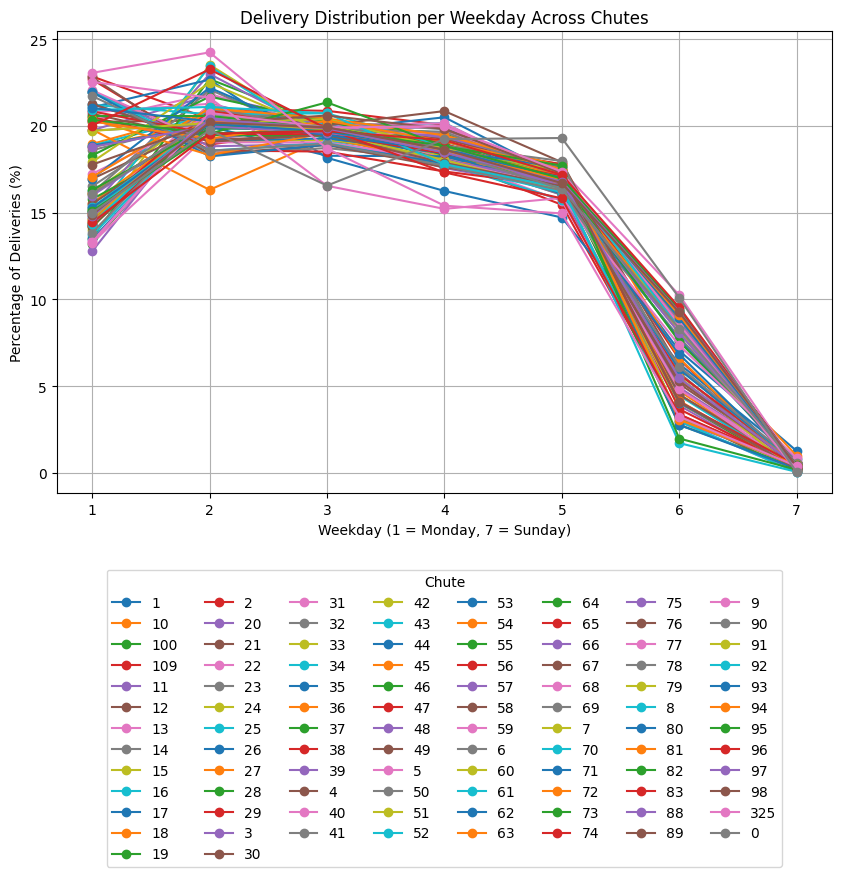

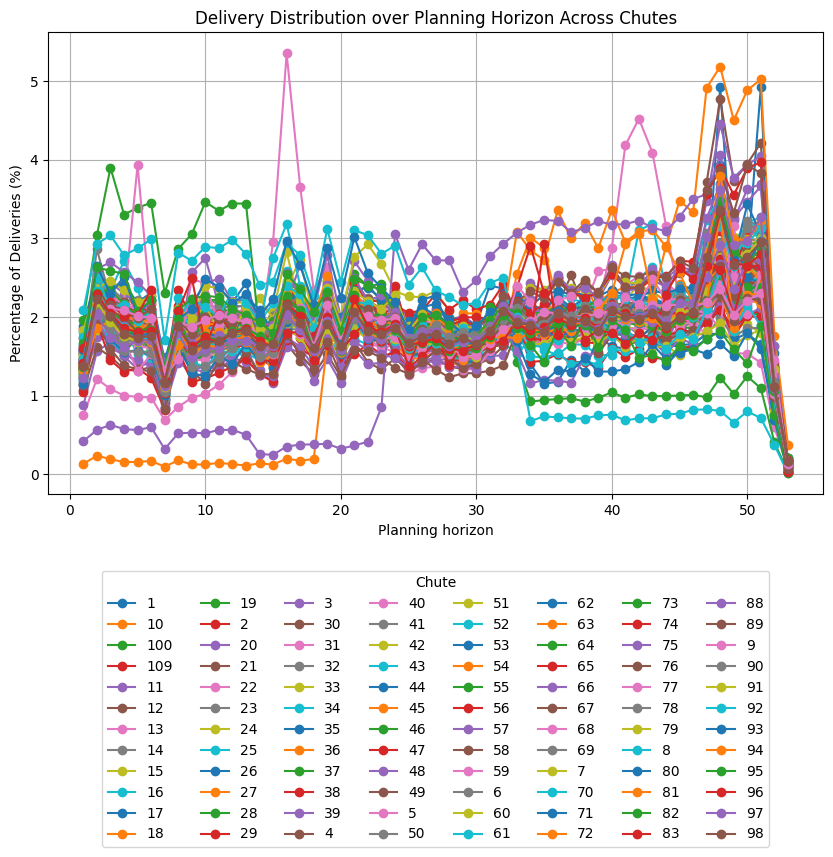

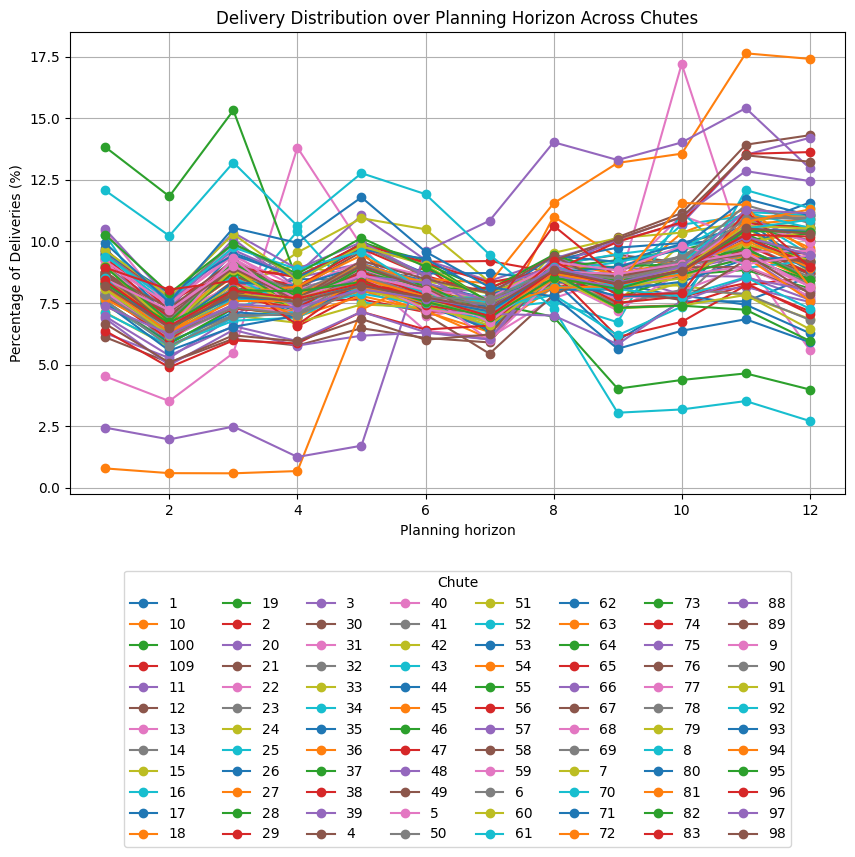

In [77]:
chute_demand_per_weekday(df, sorting_center_names[0])
chute_demand_planning_horizon_per_week(df, sorting_center_names[0])
chute_demand_planning_horizon_per_month(df, sorting_center_names[0])